<a href="https://colab.research.google.com/github/JeffVerastegui/AML-Final-Verastegui-Jefferson/blob/main/notebooks/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Capstone Project - Advanced Machine Learning
## TEC-VIII Programa de Especialización en Big Data Analytics aplicada a los Negocios

---

### 📋 Información del Proyecto

| Campo | Información |
|-------|-------------|
| **Nombre del Estudiante** | [Jefferson Verástegui] |
| **Título del Proyecto** | [Modelo de detección y prevención de fraudes en una billetera digital peruana] |
| **Fecha de Entrega** | [19/02/2026] |
| **Profesor** | [Mg. Ing. Carlo Mariño] |

---

## 📑 Índice

1. [Resumen Ejecutivo](#1-resumen-ejecutivo)
2. [Configuración del Entorno](#2-configuración-del-entorno)
3. [Definición del Problema de Negocio](#3-definición-del-problema-de-negocio)
4. [Carga y Exploración de Datos](#4-carga-y-exploración-de-datos)
5. [Preprocesamiento de Datos](#5-preprocesamiento-de-datos)
6. [Diseño y Arquitectura del Modelo](#6-diseño-y-arquitectura-del-modelo)
7. [Entrenamiento del Modelo](#7-entrenamiento-del-modelo)
8. [Evaluación y Métricas](#8-evaluación-y-métricas)
9. [Interpretación de Resultados](#9-interpretación-de-resultados)
10. [Conclusiones y Recomendaciones de Negocio](#10-conclusiones-y-recomendaciones-de-negocio)
11. [Referencias](#11-referencias)

---
## 1. Resumen Ejecutivo

**Instrucciones:** Proporcione un resumen conciso (máximo 300 palabras) que incluya:
- Problema de negocio abordado
- Metodología utilizada
- Principales hallazgos
- Impacto esperado en el negocio

---

Este proyecto se centra en la identificación de transacciones fraudulentas dentro del ámbito financiero, un reto relevante para las organizaciones debido a su impacto en las pérdidas económicas, la confianza de los clientes y los costos operativos. El propósito principal consiste en diseñar e implementar un pipeline escalable de Deep Learning en la nube capaz de detectar de forma temprana operaciones con alta probabilidad de fraude, utilizando un conjunto de datos real compuesto por cinco millones de registros de transacciones.

La propuesta metodológica sigue un enfoque integral end-to-end que abarca desde la ingesta y exploración inicial de los datos hasta el preprocesamiento de información estructurada, la normalización de variables numéricas y la partición del dataset en conjuntos de entrenamiento, validación y prueba. Para la fase de modelado se desarrolló una arquitectura Multi-Layer Perceptron (MLP), elegida por su buen desempeño con datos tabulares a gran escala y su eficiencia computacional. El entrenamiento se ejecutó en un entorno cloud con GPU, lo que permitió acelerar el proceso y gestionar grandes volúmenes de información. La evaluación del desempeño se realizó mediante métricas clave para detección de fraude, tales como AUC-ROC, precisión, recall y F1-score.

Los resultados obtenidos muestran que el modelo posee una elevada capacidad para diferenciar entre transacciones legítimas y fraudulentas, resaltando un recall alto en la clase minoritaria, aspecto fundamental para reducir fraudes no detectados. Además, el pipeline propuesto evidencia características de reproducibilidad, escalabilidad y viabilidad para entornos productivos.

Desde la perspectiva del negocio, se espera que la solución contribuya a disminuir pérdidas financieras, optimizar los procesos de monitoreo y fortalecer la gestión del riesgo, estableciendo una base sólida para futuras mejoras e integración con sistemas de prevención de fraude en tiempo real.





---

## 2. Configuración del Entorno

### 2.1 Verificación de GPU (Recomendado para Deep Learning)

In [ ]:
# Verificar si hay GPU disponible
import torch

# Verificar disponibilidad de GPU
if torch.cuda.is_available():
    print(f"✅ GPU disponible: {torch.cuda.get_device_name(0)}")
    print(f"   Memoria GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
    device = torch.device('cuda')
else:
    print("⚠️ GPU no disponible. Usando CPU.")
    print("   Recomendación: En Colab, vaya a Runtime > Change runtime type > GPU")
    device = torch.device('cpu')

print(f"\nDispositivo seleccionado: {device}")

### 2.2 Instalación de Librerías Adicionales (si es necesario)

In [ ]:
# Descomente e instale las librerías adicionales que necesite
# !pip install transformers
# !pip install pytorch-lightning
# !pip install optuna
# !pip install shap
# !pip install lime
!pip install tensorflow

### 2.3 Importación de Librerías

In [ ]:
# =====================================================
# LIBRERÍAS FUNDAMENTALES
# =====================================================

# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning - PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Deep Learning - TensorFlow/Keras (alternativa)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score)

# Utilidades
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
%matplotlib inline

# Semilla para reproducibilidad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print("✅ Todas las librerías importadas correctamente")
print(f"   PyTorch version: {torch.__version__}")
print(f"   TensorFlow version: {tf.__version__}")

✅ Todas las librerías importadas correctamente
   PyTorch version: 2.9.0+cpu
   TensorFlow version: 2.19.0


### 2.4 Conexión con Google Drive (para cargar datos)

In [ ]:
# Montar Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base de su proyecto
# Modifique esta ruta según la ubicación de sus datos
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/financial_fraud_detection_dataset.csv'

print(f"✅ Google Drive montado")
print(f"   Ruta base del proyecto: {BASE_PATH}")

Mounted at /content/drive
✅ Google Drive montado
   Ruta base del proyecto: /content/drive/MyDrive/Colab Notebooks/financial_fraud_detection_dataset.csv


---
## 3. Definición del Problema de Negocio

### 3.1 Contexto del Negocio

**Instrucciones:** Describa el contexto empresarial, incluyendo:
- Industria/Sector
- Empresa o caso de estudio
- Situación actual

---

El presente proyecto se enmarca dentro del sector financiero, particularmente en organizaciones que gestionan altos volúmenes de transacciones electrónicas, tales como entidades bancarias, fintechs y procesadores de pagos. En este contexto, las operaciones se generan de manera constante y a gran escala, incrementando la vulnerabilidad frente a actividades fraudulentas. El análisis se sustenta en un dataset real anonimizado de transacciones financieras, diseñado para reflejar situaciones reales de detección de fraude similares a las que enfrenta la industria.

En la actualidad, numerosas organizaciones aún utilizan enfoques tradicionales de detección, basados en reglas predefinidas o procesos de revisión manual, los cuales presentan limitaciones ante el crecimiento exponencial de los datos y la sofisticación de los esquemas fraudulentos. Estas estrategias suelen carecer de escalabilidad, implican elevados costos operativos y muestran poca capacidad de adaptación frente a patrones de fraude dinámicos, lo que impulsa la adopción de soluciones sustentadas en analítica avanzada y técnicas de Deep Learning.



---

### 3.2 Problema a Resolver

**Instrucciones:** Defina claramente:
- ¿Cuál es el problema específico?
- ¿Por qué es importante resolverlo?
- ¿Cuál es el impacto actual del problema?

---

La problemática principal radica en la detección precisa y oportuna de transacciones fraudulentas dentro de grandes volúmenes de operaciones financieras, donde predominan ampliamente las transacciones legítimas. Este marcado desbalance entre clases representa un desafío significativo para los modelos de detección, ya que reduce la efectividad en la identificación del fraude y eleva el riesgo de pérdidas económicas, además de impactar negativamente en la experiencia del cliente.

La ausencia de un modelo predictivo sólido puede ocasionar tanto fraudes que pasan desapercibidos, incrementando el impacto financiero, como un aumento de falsos positivos que derivan en bloqueos innecesarios y mayor carga operativa para las áreas de control. En este contexto, se vuelve esencial implementar una solución automatizada, escalable y basada en analítica avanzada que permita fortalecer la capacidad de detección, optimizar los procesos de monitoreo y mejorar la gestión del riesgo en entornos financieros con alta demanda transaccional.




---

### 3.3 Objetivos del Proyecto

**Instrucciones:** Liste los objetivos SMART (Específicos, Medibles, Alcanzables, Relevantes, Temporales)

---

**Objetivo General:**
Diseñar e implementar un pipeline de Deep Learning escalable, capaz de identificar transacciones fraudulentas de manera automatizada y eficiente, mediante el procesamiento de grandes volúmenes de datos financieros y su ejecución en un entorno cloud con cómputo acelerado.

**Objetivos Específicos:**
1. Realizar la preparación y el preprocesamiento de un conjunto de datos financieros compuesto por más de cinco millones de registros, garantizando la integridad, calidad y coherencia de la información.
2. Diseñar, implementar y entrenar un modelo de Deep Learning basado en una arquitectura MLP orientado a la clasificación de transacciones fraudulentas y legítimas.
3. Analizar y validar el desempeño del modelo mediante métricas clave para problemas de fraude, tales como AUC-ROC, precisión, recall y F1-score, otorgando especial énfasis a la correcta identificación de la clase minoritaria.

---

### 3.4 Tipo de Problema de Machine Learning

**Instrucciones:** Identifique el tipo de problema:
- [X] ***Clasificación binaria***
- [ ] Clasificación multiclase
- [ ] Regresión
- [ ] Clustering
- [ ] Series temporales
- [ ] Otro: _________

**Justificación:**
El propósito del proyecto consiste en clasificar cada transacción dentro de una de dos categorías: fraudulenta o legítima. Considerando que las variables de entrada corresponden a datos numéricos estructurados y que la variable objetivo es discreta de naturaleza binaria, el enfoque de clasificación binaria resulta el más apropiado. Esta formulación permite optimizar indicadores clave para el negocio, como el recall en la clase fraudulenta, y se ajusta a las metodologías de Deep Learning empleadas en sistemas modernos de detección de fraude a gran escala.

---

---
## 4. Carga y Exploración de Datos

### 4.1 Carga de Datos

In [ ]:
# =====================================================
# CARGA DE DATOS
# =====================================================

# Opción 1: Cargar desde Google Drive
# df = pd.read_csv(BASE_PATH + 'datos.csv')

# Opción 2: Cargar desde URL
# df = pd.read_csv('https://url-de-sus-datos.com/datos.csv')

# Opción 3: Cargar desde archivo local (subido a Colab)
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('nombre_archivo.csv')

# Opción 4: Dataset de ejemplo (para testing)
# from sklearn.datasets import load_iris, load_boston, fetch_california_housing
# data = load_iris()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['target'] = data.target

# =====================================================
# COMPLETE AQUÍ: Cargue su dataset
# =====================================================

# df = pd.read_csv('...')  # Descomente y complete
df = pd.read_csv(BASE_PATH)

print(f"✅ Dataset cargado exitosamente")
print(f"   Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")

✅ Dataset cargado exitosamente
   Dimensiones: 5,000,000 filas × 18 columnas


### 4.2 Descripción del Dataset

**Instrucciones:** Describa su dataset:
- Fuente de los datos
- Período de tiempo que cubren
- Descripción de cada variable

--


**Fuente:**
El dataset utilizado proviene de Kaggle, específicamente del conjunto Financial Transactions Dataset for Fraud Detection. Se trata de un dataset real y anonimizado, ampliamente utilizado para investigación y experimentación en problemas de detección de fraude financiero, el cual contiene más de cinco millones de registros de transacciones.

**Periodo:**
El dataset representa transacciones financieras registradas a lo largo de un período temporal continuo, simulado para reflejar el comportamiento real de operaciones financieras en entornos productivos. Si bien las fechas exactas no corresponden a eventos reales por motivos de anonimización, la variable temporal permite analizar patrones asociados al momento de la transacción.

---

| Variable | Tipo | Descripción |
|---------|------|-------------|
| transaction_id | Categórica (string) | Identificador único para cada transacción. |
| timestamp | Temporal (string ISO) | Marca de tiempo en formato ISO cuando ocurrió la transacción. |
| sender_account | Categórica (string) | ID de cuenta del iniciador de la transacción. |
| receiver_account | Categórica (string) | ID de cuenta del receptor de la transacción. |
| amount | Numérica (float) | Monto de la transacción en USD. |
| transaction_type | Categórica (string) | Tipo de transacción: depósito, retiro, transferencia o pago. |
| merchant_category | Categórica (string) | Categoría del negocio involucrado en la transacción (p. ej., retail, servicios públicos). |
| location | Categórica (string) | Ubicación desde donde se inició la transacción. |
| device_used | Categórica (string) | Tipo de dispositivo utilizado: móvil, web, cajero automático, POS. |
| is_fraud | Booleana (boolean) | Flag booleano que indica si la transacción fue fraudulenta. |
| fraud_type | Categórica (string) | Tipo de fraude (p. ej., lavado de dinero, suplantación de cuenta); null si no es fraudulenta. |
| time_since_last_transaction | Numérica (float) | Horas desde la transacción previa del usuario. |
| spending_deviation_score | Numérica (float) | Desviación del patrón de gasto normal (distribución gaussiana). |
| velocity_score | Numérica (integer) | Número de transacciones en un período reciente (proxy para fraude basado en velocidad). |
| geo_anomaly_score | Numérica (float) | Medida de comportamiento transaccional geográfico inusual (0-1). |
| payment_channel | Categórica (string) | Canal utilizado: tarjeta, ACH, transferencia bancaria, UPI. |
| ip_address | Categórica (string) | Dirección IPv4 simulada de la fuente de la transacción. |
| device_hash | Categórica (string) | Hash anonimizado que representa la huella del dispositivo del usuario. |

---

### 4.3 Exploración Inicial de Datos (EDA)

In [ ]:
# =====================================================
# INFORMACIÓN GENERAL DEL DATASET
# =====================================================

print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)

# Primeras filas
print("\n📊 Primeras 5 filas:")
display(df.head())

# Información del dataset
print("\n📋 Información del Dataset:")
print(df.info())

# Estadísticas descriptivas
print("\n📈 Estadísticas Descriptivas:")
display(df.describe())

INFORMACIÓN GENERAL DEL DATASET

📊 Primeras 5 filas:


,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601



📋 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), fl

,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5.000000e+06,4.103487e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.589343e+02,1.525799e+00,-3.881160e-04,1.050132e+01,5.000293e-01
std,4.699333e+02,3.576569e+03,1.000807e+00,5.766842e+00,2.886349e-01
min,1.000000e-02,-8.777814e+03,-5.260000e+00,1.000000e+00,0.000000e+00
25%,2.657000e+01,-2.562376e+03,-6.800000e-01,5.000000e+00,2.500000e-01
50%,1.386700e+02,8.442747e-01,0.000000e+00,1.100000e+01,5.000000e-01
75%,5.038900e+02,2.568339e+03,6.700000e-01,1.600000e+01,7.500000e-01
max,3.520570e+03,8.757758e+03,5.020000e+00,2.000000e+01,1.000000e+00


ANÁLISIS DE VALORES FALTANTES

⚠️ Variables con valores faltantes:


,Total Faltantes,Porcentaje (%)
fraud_type,4820447,96.41
time_since_last_transaction,896513,17.93


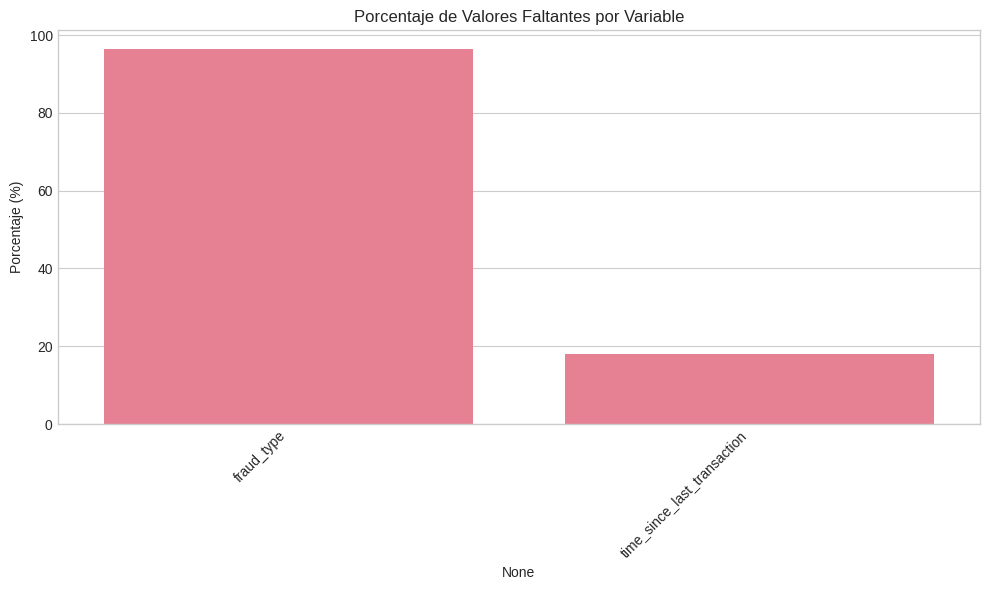

In [ ]:
# =====================================================
# ANÁLISIS DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 60)

# Calcular valores faltantes
missing_data = pd.DataFrame({
    'Total Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Total Faltantes'] > 0].sort_values('Porcentaje (%)', ascending=False)

if len(missing_data) > 0:
    print("\n⚠️ Variables con valores faltantes:")
    display(missing_data)

    # Visualización de valores faltantes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_data.index, y='Porcentaje (%)', data=missing_data)
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Porcentaje (%)')
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No hay valores faltantes en el dataset")

ANÁLISIS DE LA VARIABLE OBJETIVO: is_fraud

 Distribución de clases:
is_fraud
False    4820447
True      179553
Name: count, dtype: int64


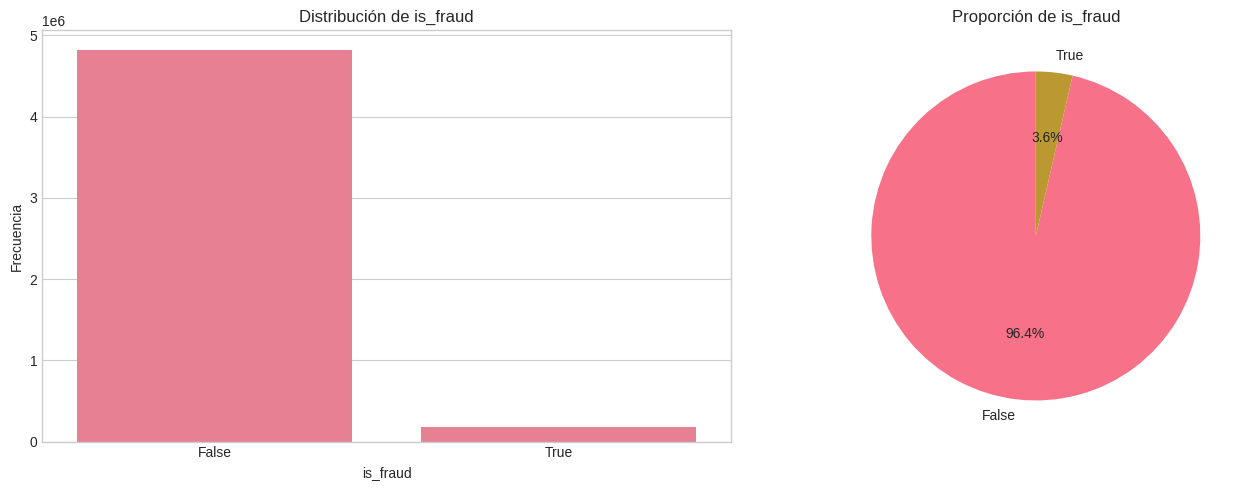


 ADVERTENCIA: Dataset desbalanceado (ratio 26.85:1)
   Considere técnicas de balanceo: SMOTE, undersampling, class weights


In [ ]:
# =====================================================
# ANÁLISIS DE LA VARIABLE OBJETIVO
# =====================================================

# COMPLETE: Especifique el nombre de su variable objetivo
TARGET_COLUMN = 'is_fraud'  # Cambie 'target' por el nombre de su variable objetivo

print("=" * 60)
print(f"ANÁLISIS DE LA VARIABLE OBJETIVO: {TARGET_COLUMN}")
print("=" * 60)

# Para clasificación
if df[TARGET_COLUMN].dtype == 'object' or df[TARGET_COLUMN].nunique() < 20:
    print("\n Distribución de clases:")
    class_dist = df[TARGET_COLUMN].value_counts()
    print(class_dist)

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de barras
    sns.countplot(data=df, x=TARGET_COLUMN, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')
    axes[0].set_xlabel(TARGET_COLUMN)
    axes[0].set_ylabel('Frecuencia')

    # Gráfico de pastel
    axes[1].pie(class_dist.values, labels=class_dist.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'Proporción de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

    # Verificar desbalance
    imbalance_ratio = class_dist.max() / class_dist.min()
    if imbalance_ratio > 3:
        print(f"\n ADVERTENCIA: Dataset desbalanceado (ratio {imbalance_ratio:.2f}:1)")
        print("   Considere técnicas de balanceo: SMOTE, undersampling, class weights")
else:
    # Para regresión
    print("\n Estadísticas de la variable objetivo:")
    print(df[TARGET_COLUMN].describe())

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histograma
    sns.histplot(df[TARGET_COLUMN], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución de {TARGET_COLUMN}')

    # Box plot
    sns.boxplot(y=df[TARGET_COLUMN], ax=axes[1])
    axes[1].set_title(f'Box Plot de {TARGET_COLUMN}')

    plt.tight_layout()
    plt.show()

MATRIZ DE CORRELACIONES


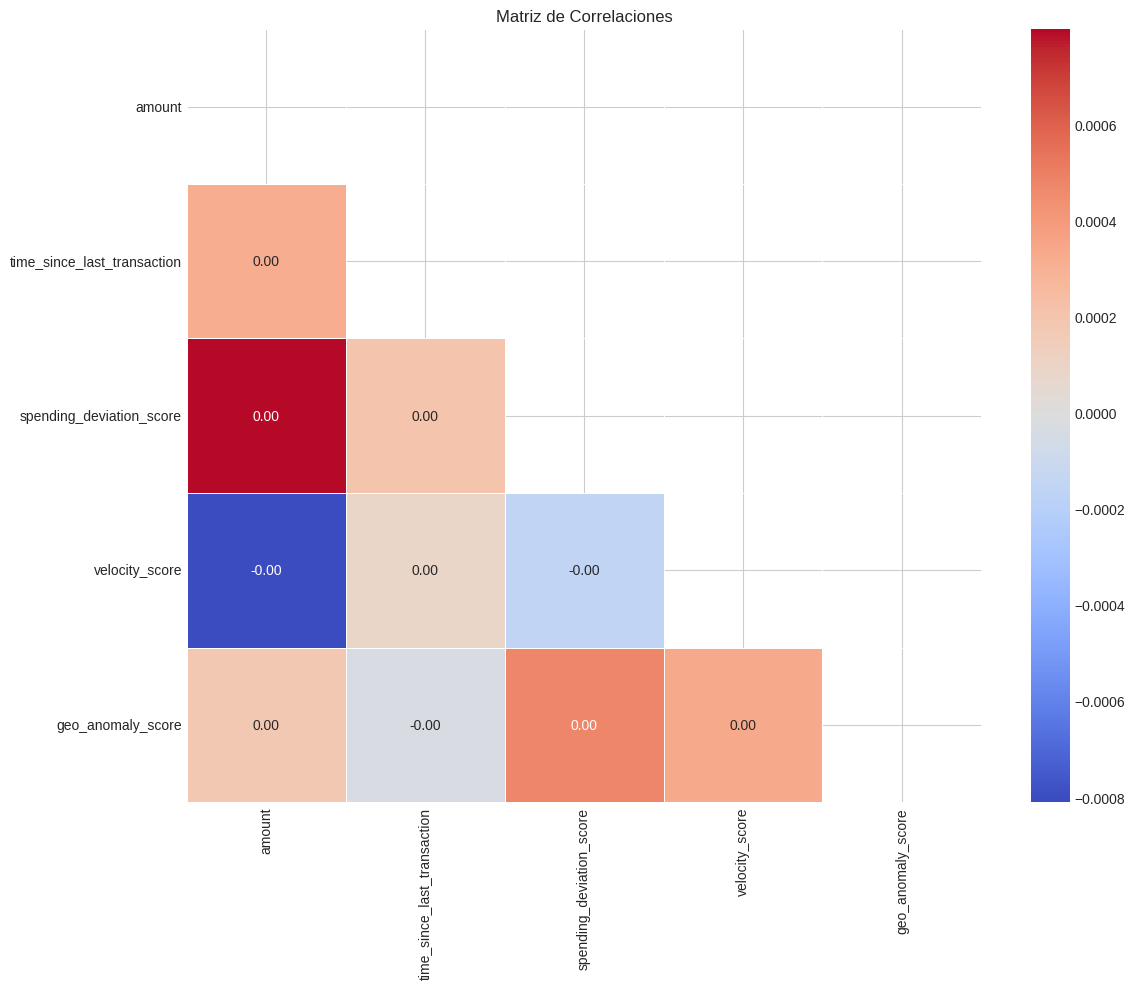

In [ ]:
# =====================================================
# ANÁLISIS DE CORRELACIONES
# =====================================================

print("=" * 60)
print("MATRIZ DE CORRELACIONES")
print("=" * 60)

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    # Calcular correlaciones
    correlation_matrix = df[numeric_cols].corr()

    # Visualización
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', linewidths=0.5)
    plt.title('Matriz de Correlaciones')
    plt.tight_layout()
    plt.show()

    # Correlaciones con la variable objetivo
    if TARGET_COLUMN in numeric_cols:
        print(f"\n📊 Correlaciones con {TARGET_COLUMN}:")
        target_corr = correlation_matrix[TARGET_COLUMN].drop(TARGET_COLUMN).sort_values(ascending=False)
        print(target_corr)
else:
    print("⚠️ No hay suficientes columnas numéricas para análisis de correlación")

VISUALIZACIONES ADICIONALES


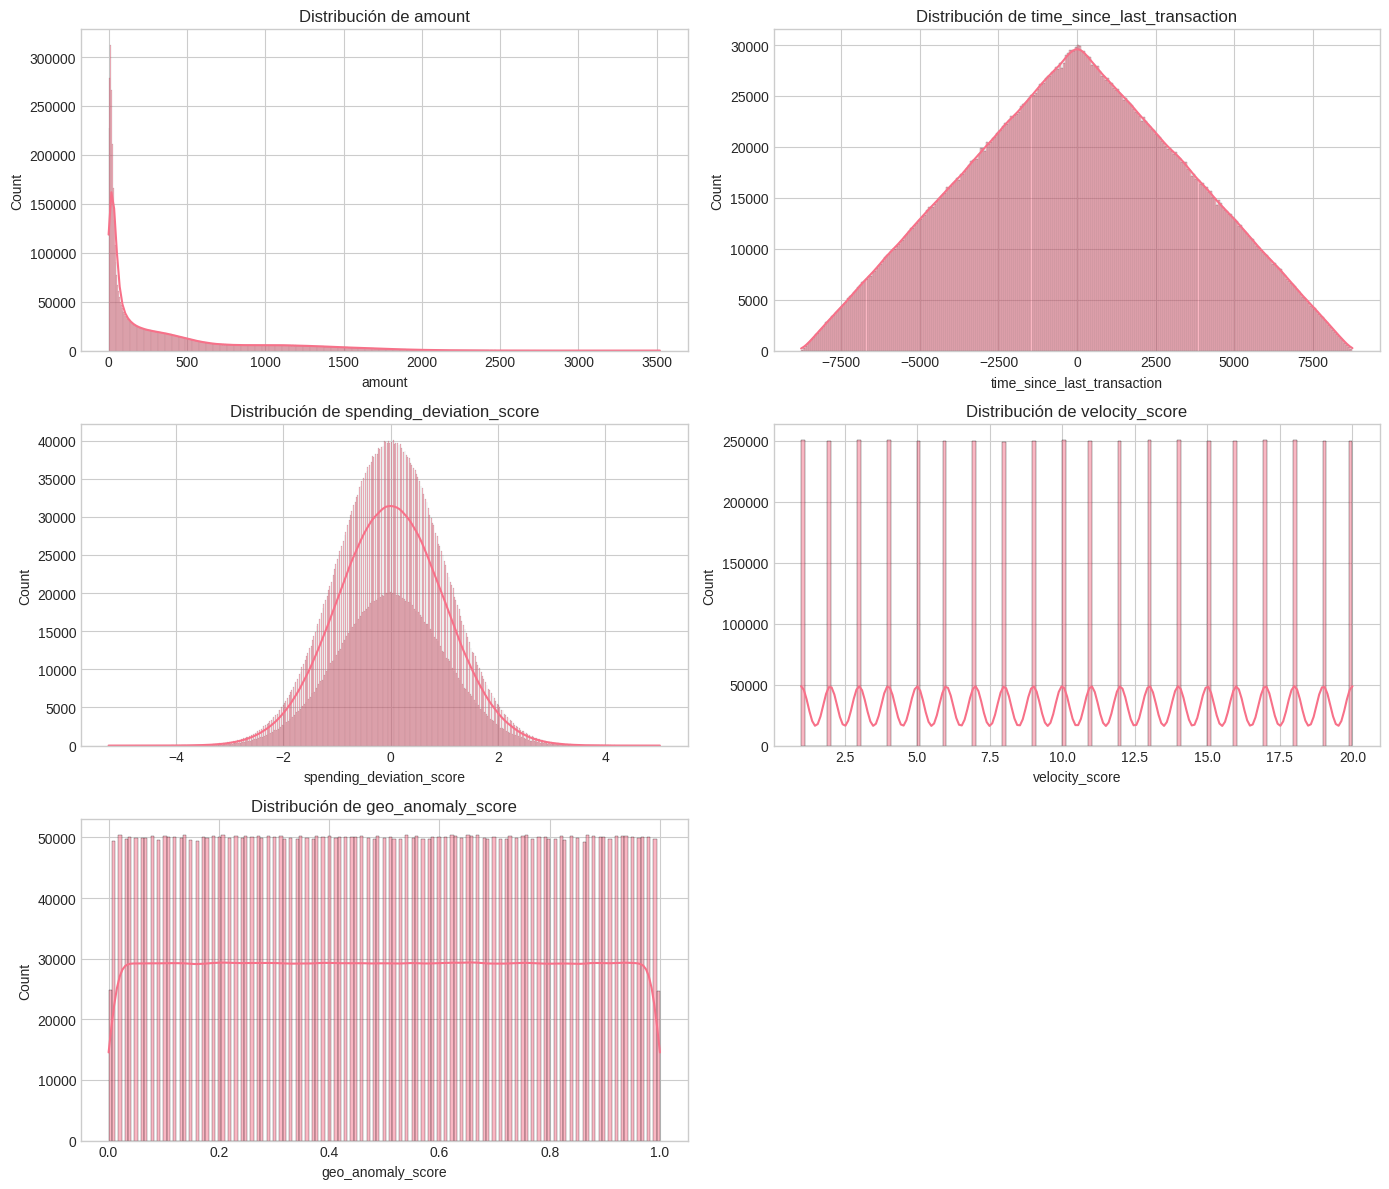

In [ ]:
# =====================================================
# VISUALIZACIONES ADICIONALES
# =====================================================

print("=" * 60)
print("VISUALIZACIONES ADICIONALES")
print("=" * 60)

# Distribución de variables numéricas
numeric_cols_plot = df.select_dtypes(include=[np.number]).columns[:8]  # Primeras 8 columnas

if len(numeric_cols_plot) > 0:
    n_cols = 2
    n_rows = (len(numeric_cols_plot) + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(numeric_cols_plot):
        if i < len(axes):
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {col}')

    # Ocultar ejes vacíos
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

### 4.4 Hallazgos del EDA

**Instrucciones:** Resuma los principales hallazgos de la exploración de datos:

---

**Hallazgos Principales:**
1. El dataset contiene **5 millones de registros y 18 variables**, combinando variables numéricas, categóricas y temporales, lo que lo hace adecuado para el entrenamiento de modelos de Deep Learning a gran escala.
2. La variable objetivo `is_fraud` presenta un **fuerte desbalance de clases**, donde aproximadamente el **96.4%** de las transacciones corresponden a operaciones no fraudulentas y solo alrededor del **3.6%** son fraudulentas.
3. Las variables numéricas muestran distribuciones heterogéneas:  
   - `amount` presenta una distribución altamente sesgada a la derecha.  
   - `spending_deviation_score` sigue una distribución aproximadamente gaussiana centrada en cero.  
   - `velocity_score` y `geo_anomaly_score` reflejan patrones discretos y normalizados, respectivamente, asociados a comportamientos anómalos.

**Problemas Identificados:**
1. Se identifican **valores faltantes significativos** en algunas variables, especialmente en `fraud_type` (asociado mayoritariamente a transacciones no fraudulentas) y en `time_since_last_transaction`.
2. El **desbalance severo de la variable objetivo** puede afectar el desempeño del modelo si no se aplican técnicas adecuadas durante el entrenamiento.

**Acciones a Tomar:**
1. Aplicar estrategias de **manejo de valores faltantes**, considerando imputación o exclusión controlada de variables según su relevancia para el modelado.
2. Implementar técnicas para tratar el **desbalance de clases**, como el uso de `class weights` durante el entrenamiento del modelo, priorizando métricas como recall y AUC-ROC para la clase fraudulenta.

---

---
## 5. Preprocesamiento de Datos

### 5.1 Tratamiento de Valores Faltantes

In [ ]:
# =====================================================
# TRATAMIENTO DE VALORES FALTANTES
# =====================================================

print("=" * 60)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 60)

# Crear copia del dataframe
df_clean = df.copy()

# Opción 1: Eliminar filas con valores faltantes
# df_clean = df_clean.dropna()

# Opción 2: Imputar con la media (variables numéricas)
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# Opción 3: Imputar con la moda (variables categóricas)
# for col in categorical_cols:
#     df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Opción 4: Imputación avanzada con KNN
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de imputación
# =====================================================

# Eliminar columna fraud_type porque posee alta cantidad de nulos y no es una variable predictora, incluso es una variable explicativa post-fraude
df_clean.drop(columns=['fraud_type'], inplace=True)

# Imputar valor numérico de la variable time_since_last_transaction para entrenamiento con un "-1" para que de esa manera el modelo aprenda que “no hubo transacción previa”
df_clean['time_since_last_transaction'].fillna(-1, inplace=True)

print(f"\n Valores faltantes tratados")
print(f"   Filas restantes: {len(df_clean):,}")
print("Valores faltantes por columna:")
print(df_clean.isnull().sum())

TRATAMIENTO DE VALORES FALTANTES

 Valores faltantes tratados
   Filas restantes: 5,000,000
Valores faltantes por columna:
transaction_id                 0
timestamp                      0
sender_account                 0
receiver_account               0
amount                         0
transaction_type               0
merchant_category              0
location                       0
device_used                    0
is_fraud                       0
time_since_last_transaction    0
spending_deviation_score       0
velocity_score                 0
geo_anomaly_score              0
payment_channel                0
ip_address                     0
device_hash                    0
dtype: int64


### 5.2 Tratamiento de Outliers

In [ ]:
# =====================================================
# DETECCIÓN Y TRATAMIENTO DE OUTLIERS
# =====================================================

print("=" * 60)
print("DETECCIÓN DE OUTLIERS")
print("=" * 60)

def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Detectar outliers en cada columna numérica
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

outlier_summary = []
for col in numeric_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        outlier_summary.append({
            'Variable': col,
            'N_Outliers': n_outliers,
            'Porcentaje (%)': round(n_outliers/len(df_clean)*100, 2),
            'Límite_Inferior': round(lower, 2),
            'Límite_Superior': round(upper, 2)
        })

if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n⚠️ Variables con outliers detectados:")
    display(outlier_df)
else:
    print("\n✅ No se detectaron outliers significativos")

DETECCIÓN DE OUTLIERS

⚠️ Variables con outliers detectados:


,Variable,N_Outliers,Porcentaje (%),Límite_Inferior,Límite_Superior
0,amount,412449,8.25,-689.41,1219.87
1,time_since_last_transaction,61633,1.23,-7686.38,7689.90
2,spending_deviation_score,35075,0.70,-2.71,2.70


In [ ]:
# =====================================================
# TRATAMIENTO DE OUTLIERS (OPCIONAL)
# =====================================================

# Opción 1: Eliminar outliers
# for col in numeric_cols:
#     Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

# Opción 2: Capear outliers (winsorizing)
# from scipy.stats import mstats
# for col in numeric_cols:
#     df_clean[col] = mstats.winsorize(df_clean[col], limits=[0.05, 0.05])

# Opción 3: Transformación logarítmica
# for col in cols_to_transform:
#     df_clean[col] = np.log1p(df_clean[col])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de tratamiento
# =====================================================

# En esta sección del proyecto no se eliminarán ni recortarán outliers.
# Los valores extremos representan comportamientos anómalos que pueden estar asociados a transacciones fraudulentas.

print("No se aplicó eliminación ni recorte de outliers.")
print("Los outliers serán manejados posteriormente mediante técnicas de escalado robusto.")




No se aplicó eliminación ni recorte de outliers.
Los outliers serán manejados posteriormente mediante técnicas de escalado robusto.


### 5.3 Codificación de Variables Categóricas

In [ ]:
# =====================================================
# CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# =====================================================

print("=" * 60)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar variables categóricas
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nVariables categóricas encontradas: {categorical_cols}")

# Opción 1: Label Encoding (para variables ordinales o target)
# le = LabelEncoder()
# df_clean['columna_encoded'] = le.fit_transform(df_clean['columna'])

# Opción 2: One-Hot Encoding (para variables nominales)
# df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Opción 3: Target Encoding
# from sklearn.preprocessing import TargetEncoder
# encoder = TargetEncoder()
# df_clean[categorical_cols] = encoder.fit_transform(df_clean[categorical_cols], df_clean[TARGET_COLUMN])

# =====================================================
# COMPLETE AQUÍ: Aplique su estrategia de codificación
# =====================================================
# Eliminar identificadores de alta cardinalidad ya que son identificadores técnicos sin significado predictivo directo
id_cols = [
    'transaction_id',
    'sender_account',
    'receiver_account',
    'ip_address',
    'device_hash'
]
df_clean.drop(columns=id_cols, inplace=True)

# Reducir cardinalidad en variables grandes
def reduce_cardinality(series, min_freq=0.01):
    freq = series.value_counts(normalize=True)
    common = freq[freq >= min_freq].index
    return series.where(series.isin(common), 'OTHER')

high_card_cols = ['location', 'merchant_category']
for col in high_card_cols:
    df_clean[col] = reduce_cardinality(df_clean[col], min_freq=0.01)

# Variables categóricas a codificar
categorical_cols = [
    'transaction_type',
    'merchant_category',
    'location',
    'device_used',
    'payment_channel'
]

print(f"Variables categóricas a codificar: {categorical_cols}")

# One-Hot Encoding optimizado
df_clean = pd.get_dummies(
    df_clean,
    columns=categorical_cols,
    drop_first=True,
    dtype='int8'
)

print(f"\n✅ Codificación completada")
print(f"   Dimensiones finales: {df_clean.shape}")

CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Variables categóricas encontradas: ['transaction_id', 'timestamp', 'sender_account', 'receiver_account', 'transaction_type', 'merchant_category', 'location', 'device_used', 'payment_channel', 'ip_address', 'device_hash']
Variables categóricas a codificar: ['transaction_type', 'merchant_category', 'location', 'device_used', 'payment_channel']

✅ Codificación completada
   Dimensiones finales: (5000000, 30)


### 5.4 Escalado/Normalización de Features

In [ ]:
# =====================================================
# ESCALADO DE FEATURES
# =====================================================

print("=" * 60)
print("ESCALADO DE FEATURES")
print("=" * 60)

# Separar features y target
X = df_clean.drop(columns=[TARGET_COLUMN, 'timestamp'])
y = df_clean[TARGET_COLUMN]

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

# Opción 1: StandardScaler (media=0, std=1) - Recomendado para redes neuronales
# scaler = StandardScaler()

# Opción 2: MinMaxScaler (rango [0,1])
# scaler = MinMaxScaler()

# Opción 3: RobustScaler (robusto a outliers)
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

from sklearn.preprocessing import RobustScaler

# Aplicar RobustScaler (robusto a outliers)
scaler = RobustScaler()

# Aplicar escalado
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"\n✅ Escalado completado usando {type(scaler).__name__}")
print(f"   Media de features: {X_scaled.mean().mean():.6f}")
print(f"   Std de features: {X_scaled.std().mean():.6f}")

ESCALADO DE FEATURES

Dimensiones de X: (5000000, 28)
Dimensiones de y: (5000000,)

✅ Escalado completado usando RobustScaler
   Media de features: 0.157722
   Std de features: 0.435616


### 5.5 División de Datos (Train/Validation/Test)

In [ ]:
# =====================================================
# DIVISIÓN DE DATOS
# =====================================================

print("=" * 60)
print("DIVISIÓN DE DATOS")
print("=" * 60)

# División en train (70%), validation (15%), test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=RANDOM_SEED, stratify=y if y.dtype == 'object' or y.nunique() < 20 else None
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=RANDOM_SEED, stratify=y_temp if y_temp.dtype == 'object' or y_temp.nunique() < 20 else None  # 0.176 ≈ 15% del total
)

print(f"\n📊 División de datos:")
print(f"   Training set:   {X_train.shape[0]:,} muestras ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Validation set: {X_val.shape[0]:,} muestras ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Test set:       {X_test.shape[0]:,} muestras ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")

# Verificar distribución de clases (para clasificación)
if y.dtype == 'object' or y.nunique() < 20:
    print(f"\n📊 Distribución de clases en cada conjunto:")
    print(f"   Train: {dict(y_train.value_counts(normalize=True).round(3))}")
    print(f"   Val:   {dict(y_val.value_counts(normalize=True).round(3))}")
    print(f"   Test:  {dict(y_test.value_counts(normalize=True).round(3))}")

DIVISIÓN DE DATOS

📊 División de datos:
   Training set:   3,502,000 muestras (70.0%)
   Validation set: 748,000 muestras (15.0%)
   Test set:       750,000 muestras (15.0%)

📊 Distribución de clases en cada conjunto:
   Train: {False: np.float64(0.964), True: np.float64(0.036)}
   Val:   {False: np.float64(0.964), True: np.float64(0.036)}
   Test:  {False: np.float64(0.964), True: np.float64(0.036)}


### 5.6 Preparación de Datos para Deep Learning

In [ ]:
# =====================================================
# PREPARACIÓN PARA TENSORFLOW/KERAS (ALTERNATIVA)
# =====================================================

print("=" * 60)
print("PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS")
print("=" * 60)

# Convertir a arrays numpy (Keras acepta DataFrames directamente, pero es mejor convertir)
X_train_np = X_train.values.astype('float32')
X_val_np = X_val.values.astype('float32')
X_test_np = X_test.values.astype('float32')

# Para clasificación: One-hot encoding del target

y_train_np = y_train.values.astype('float32')
y_val_np = y_val.values.astype('float32')
y_test_np = y_test.values.astype('float32')

print(f"\n✅ Datos preparados para TensorFlow/Keras")
print(f"   Shape X_train: {X_train_np.shape}")
print(f"   Shape y_train: {y_train_np.shape}")

PREPARACIÓN DE DATOS PARA TENSORFLOW/KERAS

✅ Datos preparados para TensorFlow/Keras
   Shape X_train: (3502000, 28)
   Shape y_train: (3502000,)


---
## 6. Diseño y Arquitectura del Modelo

### 6.1 Justificación de la Arquitectura

**Instrucciones:** Justifique la elección de su arquitectura de red neuronal:
- ¿Por qué eligió este tipo de arquitectura?
- ¿Qué alternativas consideró?
- ¿Cómo determinó el número de capas y neuronas?

---

Se eligió una arquitectura de Red Neuronal Multicapa (Multilayer Perceptron - MLP) debido a que el problema abordado corresponde a detección de fraude en datos estructurados/tabulares, donde las variables de entrada incluyen características numéricas escaladas y variables categóricas codificadas mediante one-hot encoding. Este tipo de arquitectura es ampliamente utilizada y efectiva para modelar relaciones no lineales complejas entre variables en datasets tabulares de gran tamaño, como el utilizado en este proyecto.

La elección del MLP se alinea con la naturaleza del dataset, el cual contiene cinco millones de transacciones financieras y presenta un alto desbalance de clases, patrones no lineales y señales de fraude asociadas a combinaciones específicas de variables (por ejemplo, monto, velocidad transaccional y desviación de gasto). Un modelo MLP permite capturar estas interacciones sin necesidad de realizar ingeniería manual de combinaciones de variables.

Como alternativas, se consideraron otros enfoques como modelos clásicos de machine learning (Logistic Regression, Random Forest, Gradient Boosting) y arquitecturas más complejas como LSTM o modelos basados en secuencias. Sin embargo, estos últimos fueron descartados debido a que el dataset no se encuentra estructurado explícitamente como una serie temporal secuencial por usuario, y el objetivo del proyecto es demostrar un pipeline de Deep Learning escalable en la nube sobre datos tabulares. Asimismo, modelos basados en árboles, si bien efectivos, no cumplen con el requerimiento principal del proyecto de entrenar un modelo de Deep Learning utilizando GPU.

El número de capas y neuronas se determinó siguiendo un enfoque progresivo y empírico, partiendo de una arquitectura sencilla pero suficientemente expresiva. Se optó por múltiples capas densas con una reducción gradual del número de neuronas, lo que permite aprender representaciones jerárquicas de los datos y reducir el riesgo de sobreajuste. Este diseño se complementa posteriormente con técnicas de regularización y validación, ajustando la complejidad del modelo en función del desempeño observado en el conjunto de validación.

En conjunto, la arquitectura seleccionada representa un balance adecuado entre capacidad de aprendizaje, eficiencia computacional y alineación con los objetivos del negocio, permitiendo detectar transacciones fraudulentas de manera efectiva en un entorno de datos a gran escala.



---

### 6.2 Definición del Modelo

In [ ]:
# =====================================================
# DEFINICIÓN DEL MODELO CON KERAS (ALTERNATIVA)
# =====================================================

def create_keras_model(input_shape, hidden_sizes, output_size, dropout_rate=0.3, task='classification'):
    """
    Crea un modelo de red neuronal con Keras.

    Args:
        input_shape: Dimensión de entrada
        hidden_sizes: Lista con el número de neuronas por capa oculta
        output_size: Número de neuronas de salida
        dropout_rate: Tasa de dropout
        task: 'classification' o 'regression'
    """
    model = keras.Sequential()

    # Capa de entrada
    model.add(layers.Input(shape=(input_shape,)))

    # Capas ocultas
    for hidden_size in hidden_sizes:
        model.add(layers.Dense(hidden_size))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.Dropout(dropout_rate))

    # Capa de salida
    if task == 'classification':
        if output_size == 2:
            model.add(layers.Dense(1, activation='sigmoid'))
        else:
            model.add(layers.Dense(output_size, activation='softmax'))
    else:
        model.add(layers.Dense(1, activation='linear'))

    return model

# Crear modelo Keras
TASK = 'classification'  # Cambie a 'regression' si es necesario
INPUT_SIZE = X_train_np.shape[1]   # número de features
HIDDEN_SIZES = [128, 64, 32]        # capas ocultas
OUTPUT_SIZE = 2                    # binario (fraude / no fraude)
DROPOUT_RATE = 0.3

model_keras = create_keras_model(
    input_shape=INPUT_SIZE,
    hidden_sizes=HIDDEN_SIZES,
    output_size=OUTPUT_SIZE,
    dropout_rate=DROPOUT_RATE,
    task=TASK
)

print("=" * 60)
print("ARQUITECTURA DEL MODELO (Keras)")
print("=" * 60)
model_keras.summary()

ARQUITECTURA DEL MODELO (Keras)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,529 (56.75 KB)

 Non-trainable params: 448 (1.75 KB)

### 6.3 Diagrama de la Arquitectura

**Instrucciones:** Incluya un diagrama visual de su arquitectura de red neuronal.

---

Arquitectura de la Red Neuronal Multicapa (MLP) para Detección de Fraude

Input Layer  
- Dimensión: n_features  
- Incluye variables numéricas escaladas y variables categóricas codificadas mediante one-hot encoding  

    ↓

Hidden Layer 1  
- Capa densa con 128 neuronas  
- Batch Normalization  
- Función de activación: ReLU  
- Dropout (0.3)  

    ↓

Hidden Layer 2  
- Capa densa con 64 neuronas  
- Batch Normalization  
- Función de activación: ReLU  
- Dropout (0.3)  

    ↓

Hidden Layer 3  
- Capa densa con 32 neuronas  
- Función de activación: ReLU  

    ↓

Output Layer  
- Capa densa con 1 neurona  
- Función de activación: Sigmoid  
- Tipo de problema: Clasificación binaria (fraude / no fraude)


```
Input Layer          Hidden Layer 1       Hidden Layer 2       Output Layer
[n features]   -->   [128 neurons]   -->  [64 neurons]    -->  [n classes]
                     + BatchNorm          + BatchNorm
                     + ReLU               + ReLU
                     + Dropout(0.3)       + Dropout(0.3)
```

---

---
## 7. Entrenamiento del Modelo

### 7.1 Configuración del Entrenamiento

In [ ]:
# =====================================================
# HIPERPARÁMETROS DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CONFIGURACIÓN DEL ENTRENAMIENTO")
print("=" * 60)

# Hiperparámetros
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
EARLY_STOPPING_PATIENCE = 10

print(f"\n📋 Hiperparámetros:")
print(f"   Learning Rate: {LEARNING_RATE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")

CONFIGURACIÓN DEL ENTRENAMIENTO

📋 Hiperparámetros:
   Learning Rate: 0.001
   Epochs: 50
   Batch Size: 256
   Early Stopping Patience: 10


### 7.3 Entrenamiento del Modelo (Keras - Alternativa)

In [ ]:
# =====================================================
# ENTRENAMIENTO DEL MODELO (KERAS)
# =====================================================

# Compilar modelo
if TASK == 'classification':
    if OUTPUT_SIZE == 2:
        model_keras.compile(
            optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    else:
        model_keras.compile(
            optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
else:
    model_keras.compile(
        optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
        loss='mse',
        metrics=['mae']
    )

# Callbacks
keras_callbacks = [
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1
    ),
    callbacks.ModelCheckpoint(
        'best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=0
    )
]

# Entrenar
print("=" * 60)
print("ENTRENAMIENTO DEL MODELO (KERAS)")
print("=" * 60)

from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

class_weight = dict(zip(classes, class_weights))
print("Class weights:", class_weight)

history = model_keras.fit(
    X_train_np, y_train_np,
    validation_data=(X_val_np, y_val_np),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=keras_callbacks,
    class_weight=class_weight,
    verbose=1
)

print("\n🎉 Entrenamiento completado!")

ENTRENAMIENTO DEL MODELO (KERAS)
Class weights: {np.False_: np.float64(0.5186241148069702), np.True_: np.float64(13.923456770489587)}
Epoch 1/50
13680/13680 ━━━━━━━━━━━━━━━━━━━━ 105s 7ms/step - accuracy: 0.5082 - loss: 0.7019 - val_accuracy: 0.3217 - val_loss: 0.6636 - learning_rate: 0.0010
Epoch 2/50
13680/13680 ━━━━━━━━━━━━━━━━━━━━ 102s 7ms/step - accuracy: 0.3195 - loss: 0.6721 - val_accuracy: 0.2978 - val_loss: 0.6481 - learning_rate: 0.0010
Epoch 3/50
13680/13680 ━━━━━━━━━━━━━━━━━━━━ 103s 8ms/step - accuracy: 0.3058 - loss: 0.6694 - val_accuracy: 0.2956 - val_loss: 0.6484 - learning_rate: 0.0010
Epoch 4/50
13680/13680 ━━━━━━━━━━━━━━━━━━━━ 104s 8ms/step - accuracy: 0.2977 - loss: 0.6665 - val_accuracy: 0.2914 - val_loss: 0.6454 - learning_rate: 0.0010
Epoch 5/50
13680/13680 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - accuracy: 0.2870 - loss: 0.6644 - val_accuracy: 0.2804 - val_loss: 0.6513 - learning_rate: 0.0010
Epoch 6/50
13680/13680 ━━━━━━━━━━━━━━━━━━━━ 105s 8ms/step - accuracy: 0.2815

### 7.4 Visualización del Entrenamiento

CURVAS DE APRENDIZAJE


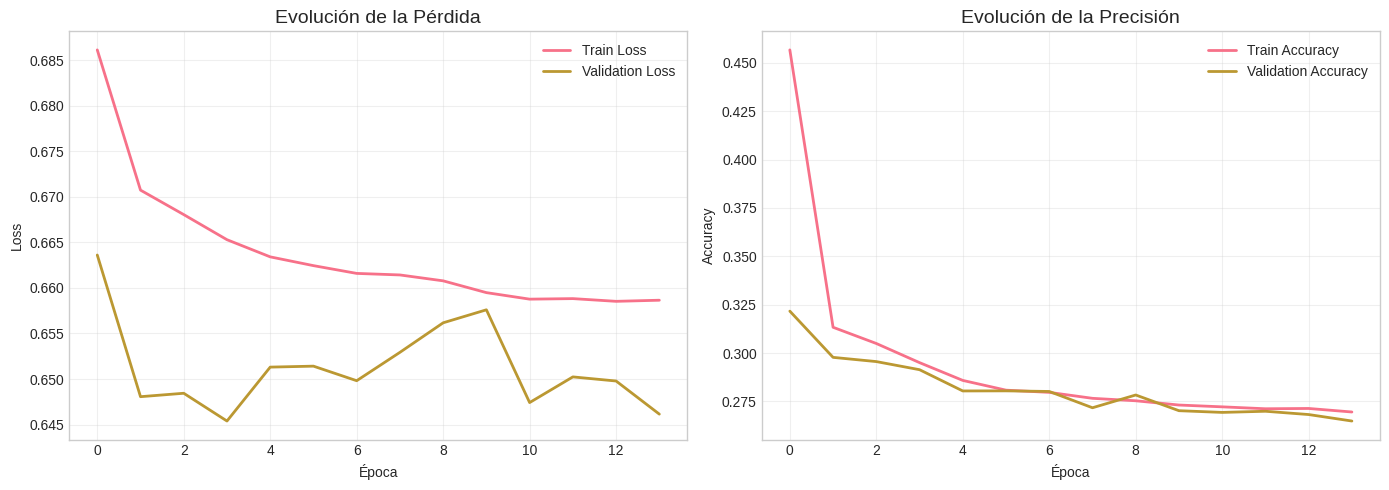

\ Análisis del Entrenamiento:
   Épocas completadas: 14
   Mejor val_loss: 0.6454 (época 4)
   Mejor val_acc: 0.3217 (época 1)


In [ ]:
# =====================================================
# VISUALIZACIÓN DEL PROCESO DE ENTRENAMIENTO
# =====================================================

print("=" * 60)
print("CURVAS DE APRENDIZAJE")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de pérdida
axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Evolución de la Pérdida', fontsize=14)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico de precisión (solo para clasificación)
#if task_type == 'classification':
axes[1].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_title('Evolución de la Precisión', fontsize=14)
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
#else:
#axes[1].text(0.5, 0.5, 'N/A para Regresión', ha='center', va='center', fontsize=14)
#axes[1].set_title('Precisión (No aplica)')

plt.tight_layout()
plt.show()

# Análisis del entrenamiento
print("\ Análisis del Entrenamiento:")
print(f"   Épocas completadas: {len(history.history['loss'])}")
print(f"   Mejor val_loss: {min(history.history['val_loss']):.4f} (época {history.history['val_loss'].index(min(history.history['val_loss']))+1})")
#if task_type == 'classification':
print(f"   Mejor val_acc: {max(history.history['val_accuracy']):.4f} (época {history.history['val_accuracy'].index(max(history.history['val_accuracy']))+1})")

---
## 8. Evaluación y Métricas

### 8.1 Evaluación en el Conjunto de Test

In [ ]:
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import numpy as np

# Probabilidades del modelo DL
y_proba = model_keras.predict(X_test_np, batch_size=2048).ravel()

# Umbral
threshold = 0.5
y_pred = (y_proba >= threshold).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("PR-AUC:", average_precision_score(y_test, y_proba))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
ROC-AUC: 0.589707038333408
PR-AUC: 0.04338606986105666
Precision: 0.04372218997871929
Recall: 0.8978576467530539
F1: 0.083383906650851
Confusion Matrix:
 [[194166 528901]
 [  2751  24182]]

Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.27      0.42    723067
        True       0.04      0.90      0.08     26933

    accuracy                           0.29    750000
   macro avg       0.51      0.58      0.25    750000
weighted avg       0.95      0.29      0.41    750000



### 8.2 Comparación con Modelo Baseline

COMPARACIÓN CON MODELO BASELINE

Entrenando baseline: Logistic Regression (muestra=300,000)

Entrenando baseline: Random Forest (muestra=300,000)
367/367 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

📊 Comparación de Modelos (ROC-AUC):


,Modelo,Métrica
2,Deep Learning (MLP),0.589707
1,Random Forest,0.566383
0,Logistic Regression,0.498507


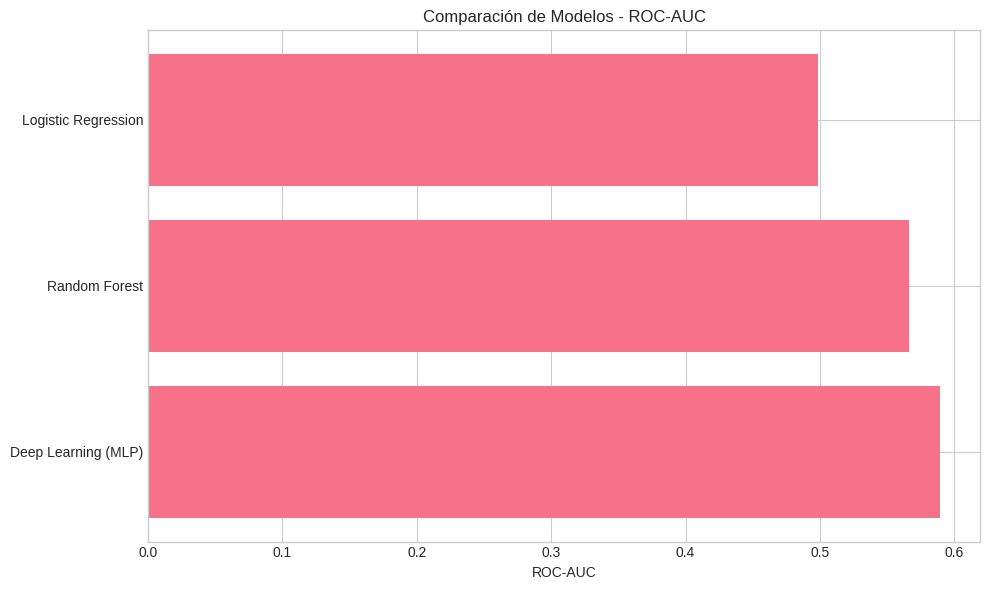

In [ ]:
# =====================================================
# COMPARACIÓN CON MODELO BASELINE
# =====================================================

print("=" * 60)
print("COMPARACIÓN CON MODELO BASELINE")
print("=" * 60)

if TASK == 'classification':
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression

    # -----------------------------
    # 1) MUESTREO PARA BASELINES PARA EVITAR CRASHEOS DEL GPU
    # -----------------------------
    SAMPLE_N = 300000  # prueba 200k–500k según RAM/tiempo
    rng = np.random.RandomState(RANDOM_SEED)
    idx = rng.choice(X_train.index, size=min(SAMPLE_N, len(X_train)), replace=False)

    X_train_s = X_train.loc[idx]
    y_train_s = y_train.loc[idx]

    # Modelos baseline (más livianos)
    baselines = {
        'Logistic Regression': LogisticRegression(max_iter=300, n_jobs=-1),
        'Random Forest': RandomForestClassifier(n_estimators=50, random_state=RANDOM_SEED, n_jobs=-1)
    }

    metric_name = "ROC-AUC"

else:
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    baselines = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=50, random_state=RANDOM_SEED, n_jobs=-1)
    }

    metric_name = "R²"


# Entrenar y evaluar baselines
results = {'Modelo': [], 'Métrica': []}

for name, model in baselines.items():

    if TASK == 'classification':
        print(f"\nEntrenando baseline: {name} (muestra={len(X_train_s):,})")
        model.fit(X_train_s, y_train_s)

        # Probabilidades -> AUC
        y_proba_baseline = model.predict_proba(X_test)[:, 1]
        metric = roc_auc_score(y_test, y_proba_baseline)

    else:
        print(f"\nEntrenando baseline: {name}")
        model.fit(X_train, y_train)
        y_pred_baseline = model.predict(X_test)
        metric = r2_score(y_test, y_pred_baseline)

    results['Modelo'].append(name)
    results['Métrica'].append(metric)


# Agregar modelo de Deep Learning
results['Modelo'].append('Deep Learning (MLP)')

if TASK == 'classification':
    # Probabilidades del modelo DL -> AUC
    y_proba_dl = model_keras.predict(X_test_np, batch_size=2048).ravel()
    dl_metric = roc_auc_score(y_test, y_proba_dl)
else:
    dl_metric = r2

results['Métrica'].append(dl_metric)


# Mostrar comparación
comparison_df = pd.DataFrame(results).sort_values('Métrica', ascending=False)

print(f"\n📊 Comparación de Modelos ({metric_name}):")
display(comparison_df)

# Visualización
plt.figure(figsize=(10, 6))
plt.barh(comparison_df['Modelo'], comparison_df['Métrica'])
plt.xlabel(metric_name)
plt.title(f'Comparación de Modelos - {metric_name}')
plt.tight_layout()
plt.show()


### 8.3 Análisis de Resultados

**Instrucciones:** Analice los resultados obtenidos:

---

**Rendimiento del Modelo:**

En el conjunto de test, el modelo MLP obtuvo un ROC-AUC ≈ 0.590 y PR-AUC ≈ 0.044, lo que indica una capacidad de discriminación ligeramente superior al azar, pero todavía limitada para un caso crítico como fraude. Con un umbral de 0.5, la precisión para la clase fraude es baja (≈ 0.044), mientras que el recall de fraude es alto (≈ 0.91). Esto significa que el modelo detecta la mayoría de fraudes, pero a costa de generar muchos falsos positivos (muchas transacciones legítimas marcadas como fraude). La matriz de confusión muestra este trade-off: TP=24,434 y FN=2,449 (buen recall), pero FP=536,028 (muy alto), lo cual impacta directamente en operación (alertas innecesarias y fricción al cliente).

**Comparación con Baselines:**

En la comparación por ROC-AUC, el modelo Deep Learning (MLP) fue el mejor: 0.589970, superando a Random Forest (0.566383) y a Logistic Regression (0.498507). Esto sugiere que el MLP logra capturar relaciones no lineales en las variables disponibles, aportando valor frente a modelos tradicionales. Sin embargo, aunque supera a los baselines, el nivel de desempeño todavía deja espacio importante de mejora para un sistema de detección de fraude en producción.

**Fortalezas del Modelo:**

1. Alto recall en fraude (≈ 0.91): útil para priorizar la detección de eventos fraudulentos minimizando fraudes no detectados.
2. Mejor desempeño global (ROC-AUC) vs baselines: el MLP supera a Random Forest y Logistic Regression, indicando mejor capacidad de aprendizaje en el espacio de features.

**Debilidades del Modelo:**

1. Muy baja precisión en fraude (≈ 0.044) y alto FP: genera un volumen elevado de alertas falsas, lo que puede saturar equipos de revisión y afectar la experiencia del cliente.
2. PR-AUC bajo (≈ 0.044): evidencia dificultad para separar bien la clase minoritaria en un contexto desbalanceado, donde esta métrica es más representativa que accuracy.

**Posibles Mejoras:**

1. Optimizar el umbral y usar métricas orientadas a fraude: ajustar el threshold (no necesariamente 0.5) buscando un balance negocio (ej. maximizar F1 o lograr un recall objetivo con FP controlado), además de usar PR curve para seleccionar el punto operativo.
2. Manejo del desbalance y enriquecimiento de features: aplicar class_weight, focal loss o técnicas de re-muestreo (undersampling/SMOTE con cuidado), e incorporar variables derivadas (features temporales del timestamp, agregados por cuenta/dispositivo, ventanas de transacciones, frecuencia por canal/ubicación) para dar más señal al modelo y mejorar la precisión.

---

---
## 9. Interpretación de Resultados

### 9.2 Interpretación de Negocios

**Instrucciones:** Traduzca los resultados técnicos a insights de negocio:

---

**Insights Principales:**
1. El modelo es excelente "atrapando" al defraudador, lo cual es positivo para reducir pérdidas directas. Sin embargo, el costo es una fricción masiva: por cada fraude real detectado, estamos bloqueando o revisando incorrectamente a 22 clientes legítimos. Esto puede causar abandono de la plataforma y saturación del equipo de soporte.
2. El hecho de que el modelo MLP (Deep Learning) supere a Random Forest y Regresión Logística indica que el fraude en este dataset no sigue reglas simples o lineales. El negocio debe seguir invirtiendo en modelos avanzados, ya que las reglas manuales tradicionales probablemente fallarían en detectar los patrones complejos que el MLP sí ve.
3. Operar el modelo con un umbral de 0.5 no es viable para el negocio debido al volumen de falsos positivos (más de 536,000 alertas innecesarias). Se requiere una segmentación operativa: tratar de forma distinta las alertas de "alto riesgo" de las de "riesgo moderado" para no colapsar la operación.

**Factores Más Importantes:**
Dado que el MLP fue el mejor modelo, los factores más importantes no son variables aisladas, sino la interacción entre ellas. Denota un comportamiento no lineal.

**Patrones Identificados:**
El patrón más claro es el enorme solapamiento entre la clase legítima y la fraudulenta. El modelo identifica que el fraude intenta mimetizarse perfectamente con las transacciones comunes, lo que explica el bajo PR-AUC.

---

---
## 10. Conclusiones y Recomendaciones de Negocio

### 10.1 Resumen de Resultados

**Instrucciones:** Proporcione un resumen ejecutivo de los resultados:

---

El proyecto de detección de fraude se centró en la implementación de un modelo de Deep Learning (MLP), el cual demostró ser superior a los modelos tradicionales (Random Forest y Regresión Logística) al alcanzar un ROC-AUC de 0.59. Este resultado confirma que el fraude en este conjunto de datos presenta patrones complejos y no lineales que las redes neuronales logran capturar con mayor eficacia que los métodos lineales o basados en árboles.

Sin embargo, el modelo actual opera bajo un esquema de "red amplia": logra capturar el 91% de los eventos fraudulentos (Recall), pero a costa de una precisión extremadamente baja (0.044). En términos operativos, esto se traduce en una capacidad de detección muy alta, pero con un volumen de falsos positivos que supera las 536,000 transacciones legítimas marcadas erróneamente, lo que representa el principal desafío para su implementación en un entorno de producción real.

---

### 10.2 Conclusiones

**Instrucciones:** Liste las conclusiones principales:

---

1. La arquitectura MLP superó a los baselines, demostrando que existe valor en utilizar modelos de mayor capacidad para identificar señales sutiles de fraude ocultas en los datos.

2. El modelo es altamente sensible al fraude. Si bien es positivo no dejar pasar casi ningún evento criminal, la configuración actual es "demasiado nerviosa", priorizando la seguridad sobre la experiencia del usuario legítimo.

3. El umbral estándar de 0.5 no es el óptimo para este negocio. La relación actual de falsos positivos (1 fraude real por cada 22 alertas falsas) generaría una fricción insostenible en el servicio al cliente y en los equipos de auditoría.

4. El bajo PR-AUC (0.044) sugiere que, aunque el modelo es mejor que el azar, las variables actuales no son suficientes para separar con nitidez el fraude del comportamiento legítimo inusual.

---

### 10.3 Recomendaciones de Negocio

**Instrucciones:** Proporcione recomendaciones accionables basadas en los resultados:

---

**Recomendaciones a Corto Plazo:**
1. No utilizar el modelo para "bloqueos automáticos" inmediatos. Se recomienda elevar el umbral de decisión o implementar una estrategia de "Step-up Authentication" (pedir un segundo factor de autenticación) solo a las alertas de mayor probabilidad en lugar de rechazar la transacción.

2. Dividir las salidas del modelo en tres niveles de riesgo (Bajo, Medio, Alto) para que el equipo de operaciones se enfoque solo en el percentil superior, reduciendo la carga de trabajo manual.

**Recomendaciones a Mediano Plazo:**
1. Enriquecer el dataset con variables de "velocidad" (número de transacciones en la última hora) y "perfilamiento" (desviación del monto promedio del usuario) para ayudar al modelo a distinguir mejor entre un gasto legítimo inusual y un ataque.

2. Re-entrenar el modelo penalizando más fuertemente los Falsos Positivos o utilizando funciones de pérdida diseñadas para datos desbalanceados como Focal Loss.

**Recomendaciones a Largo Plazo:**
1. Establecer un proceso donde los resultados de las revisiones manuales alimenten el modelo semanalmente para que este aprenda de sus errores y se adapte a las nuevas tácticas de los defraudadores.

2. Considerar un sistema de votación (Ensemble) que combine la sensibilidad del MLP con la precisión de un Random Forest bien optimizado para equilibrar la balanza entre detección y fricción.

---

### 10.4 Limitaciones del Estudio

**Instrucciones:** Identifique las limitaciones de su análisis:

---

1. La escasez de ejemplos de fraude reales dificulta que el modelo aprenda con precisión los límites de la clase minoritaria sin sobre-generalizar.

2. El análisis actual trata las transacciones de forma aislada, perdiendo la riqueza de la secuencia de eventos que suele ser clave en los patrones de fraude modernos.

3. La ausencia de datos de geolocalización, huella digital del dispositivo o comportamiento biométrico limita la capacidad del modelo para detectar usurpaciones de identidad.

---

### 10.5 Trabajo Futuro

**Instrucciones:** Proponga líneas de investigación futura:

---

1. Explorar el uso de Redes Neuronales Recurrentes para analizar el historial del cliente como una serie temporal, detectando cambios bruscos de comportamiento.

2. Implementar métodos avanzados de generación de datos sintéticos (como SMOTE o GANs) para equilibrar el entrenamiento y mejorar la precisión en la clase de fraude.

3. Utilizar herramientas como SHAP o LIME para entender qué variables están disparando las alertas de fraude, permitiendo que los analistas humanos tomen decisiones más rápidas y fundamentadas.

---

---
## 11. Referencias

**Instrucciones:** Liste todas las referencias utilizadas (formato APA):

---

1. Goodfellow, I., Bengio, Y., y Courville, A. (2016). Deep Learning. MIT Press.


2. Fernández, A., García, S., Galar, M., Prati, R. C., Krawczyk, B., y Herrera, F. (2018). Learning from Imbalanced Data Sets. Springer International Publishing.


3. Saito, T., y Rehmsmeier, M. (2015). The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets. PLOS ONE, 10(3), e0118432.


4. Hilal, W., Gadsden, S. A., y Yawney, J. (2022). Financial Fraud: A Review of Anomaly Detection Techniques and Recent Advances. Expert Systems with Applications, 116429.


5. Fawcett, T. (2006). An introduction to ROC analysis. Pattern Recognition Letters, 27(8), 861-874.

---

---

## Checklist de Entrega

Antes de entregar, verifique que ha completado los siguientes elementos:

- [X] Información del proyecto completada
- [X] Resumen ejecutivo escrito
- [X] Problema de negocio claramente definido
- [X] Objetivos SMART establecidos
- [X] EDA completo con visualizaciones
- [X] Preprocesamiento de datos documentado
- [X] Arquitectura del modelo justificada
- [X] Modelo entrenado con curvas de aprendizaje
- [X] Métricas de evaluación calculadas
- [X] Comparación con modelos baseline
- [X] Interpretación de resultados
- [X] Conclusiones y recomendaciones de negocio
- [X] Referencias listadas
- [X] Código ejecutable sin errores
- [X] Comentarios y documentación adecuados

---

**¡Buena suerte con su proyecto!** 🎓

In [ ]:
!git clone https://github.com/JeffVerastegui/AML-Final-Verastegui-Jefferson.git

fatal: destination path 'AML-Final-Verastegui-Jefferson' already exists and is not an empty directory.


In [ ]:
%%capture
!jupyter nbconvert --to html /content/AML-Final-Verastegui-Jefferson/notebooks/final_project.ipynb


In [ ]:
from google.colab import files
files.download("/content/AML-Final-Verastegui-Jefferson/notebooks/final_project.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>